In [140]:
import geopandas
import pandas
import libpysal
import matplotlib.pyplot as plt
import numpy
import spopt
from spopt.region import MaxPHeuristic as MaxP
from spopt.region import RegionKMeansHeuristic
import warnings
from sklearn.metrics import pairwise as skm

In [141]:
community_areas_chicago = {
    'OHARE': 0,
    'EDISON PARK': 0,
    'NORWOOD PARK': 0,
    'JEFFERSON PARK': 0,
    'FOREST GLEN': 0,
    'NORTH PARK': 0,
    'ALBANY PARK': 0,
    'WEST RIDGE': 0,
    'ROGERS PARK': 0,
    'UPTOWN': 0,
    'LINCOLN SQUARE': 0,
    'EDGEWATER': 0,
    'DUNNING': 1,
    'MONTCLARE': 1,
    'BELMONT CRAGIN': 1,
    'HERMOSA': 1,
    'IRVING PARK': 1,
    'PORTAGE PARK': 1,
    'AVONDALE': 2,
    'LOGAN SQUARE': 2,
    'NORTH CENTER': 2,
    'LAKE VIEW': 2,
    'LINCOLN PARK': 2,
    'AUSTIN': 3,
    'WEST GARFIELD PARK': 3,
    'EAST GARFIELD PARK': 3,
    'NEAR WEST SIDE': 3,
    'NORTH LAWNDALE': 3,
    'SOUTH LAWNDALE': 3,
    'LOWER WEST SIDE': 3,
    'HUMBOLDT PARK': 3,
    'WEST TOWN': 3,
    'NEAR NORTH SIDE': 4,
    'LOOP': 4,
    'NEAR SOUTH SIDE': 4,
    'BRIDGEPORT': 5,
    'ARMOUR SQUARE': 5,
    'DOUGLAS': 5,
    'OAKLAND': 5,
    'FULLER PARK': 5,
    'BRIDGE PORT': 5,
    'GRAND BOULEVARD': 5,
    'KENWOOD': 5,
    'WASHINGTON PARK': 5,
    'HYDE PARK': 5,
    'WOODLAWN': 5,
    'SOUTH SHORE': 5,
    'GREATER GRAND CROSSING': 5,
    'CHATHAM': 6,
    'AVALON PARK': 6,
    'SOUTH CHICAGO': 6,
    'BURNSIDE': 6,
    'CALUMET HEIGHTS': 6,
    'ROSELAND': 6,
    'PULLMAN': 6,
    'SOUTH DEERING': 6,
    'EAST SIDE': 6,
    'WEST PULLMAN': 6,
    'RIVERDALE': 6,
    'HEGEWISCH': 6,
    'GARFIELD RIDGE': 7,
    'ARCHER HEIGHTS': 7,
    'BRIGHTON PARK': 7,
    'MCKINLEY PARK': 7,
    'WEST ELSDON': 7,
    'GAGE PARK': 7,
    'CLEARING': 7,
    'WEST LAWN': 7,
    'CHICAGO LAWN': 7,
    'WEST ENGLEWOOD': 7,
    'ENGLEWOOD': 7,
    'NEW CITY': 7,
    'ASHBURN': 8,
    'AUBURN GRESHAM': 8,
    'BEVERLY': 8,
    'WASHINGTON HEIGHTS': 8,
    'MORGAN PARK': 8,
    'MOUNT GREENWOOD': 8
}

In [142]:
chicago_boundaries = geopandas.read_file('/home/gegen07/Área de Trabalho/Boundaries - Community Areas (current)/geo_export_d88a1f6c-06ab-4883-a12c-cb28af75dab7.shp').to_crs(epsg=4326)
chicago_boundaries['regions'] = chicago_boundaries['community'].map(community_areas_chicago)
census_tract = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/data/cta_chicago.csv')
census_tract = geopandas.GeoDataFrame(census_tract, geometry=geopandas.GeoSeries.from_wkt(census_tract['geometry']), crs=4326)
chicago_boundaries = geopandas.sjoin(chicago_boundaries, census_tract, how='inner', predicate='intersects')

In [125]:
from sklearn.preprocessing import LabelEncoder
new_york_boundaries = geopandas.read_file('/home/gegen07/Área de Trabalho/Community Districts/geo_export_ce53ed76-6757-4adb-b23a-ec1477bc0805.shp').to_crs(epsg=4326)
boroughs_boundaries = geopandas.read_file('/home/gegen07/Área de Trabalho/Borough Boundaries/geo_export_d2a4cc77-f08d-496b-9d44-2031aadfc30c.shp').to_crs(epsg=4326)
# boroughs_boundaries['regions'] = boroughs_boundaries['boro_code'].astype('int')
new_york_boundaries = geopandas.sjoin(new_york_boundaries, boroughs_boundaries, how='inner', predicate='intersects')
new_york_boundaries = new_york_boundaries[new_york_boundaries['boro_name'] == 'Manhattan']
new_york_boundaries.drop(columns=['index_right'], inplace=True, axis=1)
census_tract = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/data/cta_nyc.csv')
census_tract = geopandas.GeoDataFrame(census_tract, geometry=geopandas.GeoSeries.from_wkt(census_tract['geometry']), crs=4326)
new_york_boundaries = geopandas.sjoin(new_york_boundaries, census_tract, how='inner', predicate='intersects')
new_york_boundaries['regions'] = LabelEncoder().fit_transform(new_york_boundaries['boro_cd'])
new_york_boundaries

,boro_cd,shape_area_left,shape_leng_left,geometry,boro_code,boro_name,shape_area_right,shape_leng_right,index_right,BoroCT2020,GEOID,regions
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...",1.0,Manhattan,6.366461e+08,360037.525777,1010,1014500,36061014500,12
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...",1.0,Manhattan,6.366461e+08,360037.525777,64,1011202,36061011202,12
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...",1.0,Manhattan,6.366461e+08,360037.525777,63,1011201,36061011201,12
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...",1.0,Manhattan,6.366461e+08,360037.525777,2119,1011401,36061011401,12
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...",1.0,Manhattan,6.366461e+08,360037.525777,1008,1013700,36061013700,12
...,...,...,...,...,...,...,...,...,...,...,...,...
65,402.0,1.400101e+08,72490.038462,"POLYGON ((-73.89792 40.75424, -73.89797 40.754...",1.0,Manhattan,6.366461e+08,360037.525777,369,4000702,36081000702,19
65,402.0,1.400101e+08,72490.038462,"POLYGON ((-73.89792 40.75424, -73.89797 40.754...",1.0,Manhattan,6.366461e+08,360037.525777,1141,4001903,36081001903,19
65,402.0,1.400101e+08,72490.038462,"POLYGON ((-73.89792 40.75424, -73.89797 40.754...",1.0,Manhattan,6.366461e+08,360037.525777,999,4000103,36081000103,19
65,402.0,1.400101e+08,72490.038462,"POLYGON ((-73.89792 40.75424, -73.89797 40.754...",1.0,Manhattan,6.366461e+08,360037.525777,1123,4002500,36081002500,19


In [126]:
new_york_boundaries['regions'].nunique()

20

In [143]:
# column = 'BoroCT2020'
column = 'GEOID'

our_model = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/model/region-embedding-chicago.csv')
# our_model = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/model/region-embedding-new-york.csv')
unique_regions = our_model[column].unique()

region_dcl = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/regionDCL/data/region_embedding-chicago.csv')
# region_dcl = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/regionDCL/data/region_embedding.csv')
region_dcl = region_dcl[region_dcl[column].isin(unique_regions)]

poi_encoder = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/poi-encoder/data/region_embedding-chicago.csv')
# poi_encoder = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/poi-encoder/data/region_embedding.csv')
poi_encoder = poi_encoder[poi_encoder[column].isin(unique_regions)]

hgi = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/HGI/data/region_embedding-chicago.csv')
# hgi = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/HGI/data/region_embedding.csv')
hgi = hgi[hgi[column].isin(unique_regions)]

dgi = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/DGI/notebooks/chicago-DGI.csv')
# dgi = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/DGI/notebooks/new-york-DGI.csv')
dgi = dgi[dgi[column].isin(unique_regions)]

gae = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/GAE/notebooks/chicago-GAE.csv')
# gae = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/baselines/GAE/notebooks/new-york-GAE.csv')
gae = gae[gae[column].isin(unique_regions)]

census_tract = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/data/cta_chicago.csv')
# census_tract = pandas.read_csv('/home/gegen07/dev/projects/region-embedding-benchmark/region-embedding/data/cta_nyc.csv')

In [144]:
def regionalization(df, census_tract, boundaries, column):
    if 'geometry' not in df.columns:
        df = df.merge(census_tract[[column, 'geometry']], on=column)

    df = df[df[column].isin(boundaries[column].unique().tolist())].sort_values(column, ascending=True).reset_index(drop=True)
    gdf = geopandas.GeoDataFrame(df, geometry=geopandas.GeoSeries.from_wkt(df['geometry']))

    with warnings.catch_warnings(record=True):
        w = libpysal.weights.fuzzy_contiguity(gdf)

    # n_clusters = 20
    n_clusters = 9
    floor = 1
    trace = False
    islands = "ignore"

    spanning_forest_kwds = dict(
        dissimilarity=skm.manhattan_distances,
        affinity=None,
        reduction=numpy.sum,
        center=numpy.mean,
        verbose=0
    )

    attrs_name = [f"{i}" for i in range(0,64)]

    model = spopt.region.Skater(
            gdf,
            w,
            attrs_name,
            n_clusters=n_clusters,
            floor=floor,
            trace=trace,
            islands=islands,
            spanning_forest_kwds=spanning_forest_kwds,
        )
    model.solve()

    gdf["regions"] = model.labels_

    gdf = gdf.sort_values(column, ascending=True).reset_index(drop=True)
    boundaries = boundaries.drop_duplicates(subset=[column], keep='first')
    boundaries = boundaries[boundaries[column].isin(gdf[column].unique().tolist())].sort_values(column, ascending=True).reset_index(drop=True)

    # compute ARI, NMI, F1-Score metrics
    from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
    from sklearn.metrics import f1_score

    ari = adjusted_rand_score(boundaries['regions'], gdf['regions'])
    nmi = normalized_mutual_info_score(boundaries['regions'], gdf['regions'])
    f1 = f1_score(boundaries['regions'], gdf['regions'], average='weighted')

    return gdf, ari, nmi, f1

In [145]:
boundaries = chicago_boundaries
# boundaries = new_york_boundaries

d = {
    'ground_truth': {'name': 'Ground Truth', 'gdf': boundaries},
    'our_model': {'name': 'Our Model'},
    'region_dcl': {'name': 'RegionDCL'},
    'poi_encoder': {'name': 'POI-Encoder'},
    'hgi': {'name': 'HGI'},
    'dgi': {'name': 'DGI'},
    'gae': {'name': 'GAE'},
}


d['our_model']['gdf'], d['our_model']['ari'], d['our_model']['nmi'], d['our_model']['f1'] = regionalization(our_model, census_tract, boundaries, column)
print('our_model finished')

d['region_dcl']['gdf'], d['region_dcl']['ari'], d['region_dcl']['nmi'], d['region_dcl']['f1'] = regionalization(region_dcl, census_tract, boundaries, column)
print('region_dcl finished')

d['poi_encoder']['gdf'], d['poi_encoder']['ari'], d['poi_encoder']['nmi'], d['poi_encoder']['f1'] = regionalization(poi_encoder, census_tract, boundaries, column)
print('poi_encoder finished')

d['hgi']['gdf'], d['hgi']['ari'], d['hgi']['nmi'], d['hgi']['f1'] = regionalization(hgi, census_tract, boundaries, column)
print('hgi finished')

d['dgi']['gdf'], d['dgi']['ari'], d['dgi']['nmi'], d['dgi']['f1'] = regionalization(dgi, census_tract, boundaries, column)
print('dgi finished')

d['gae']['gdf'], d['gae']['ari'], d['gae']['nmi'], d['gae']['f1'] = regionalization(gae, census_tract, boundaries, column)
print('gae finished')

our_model finished
region_dcl finished
poi_encoder finished
hgi finished
dgi finished
gae finished


## New York

In [139]:
for x in d.keys():
    if x == 'ground_truth':
        continue
    print(f"""{d[x]['name']} - ARI: {d[x]['ari']}, NMI: {d[x]['nmi']}""")

Our Model - ARI: 0.40914718947579043, NMI: 0.7062892747431448, F1-Score: 0.13818965628547314
RegionDCL - ARI: 0.4663588453505572, NMI: 0.713751998674913, F1-Score: 0.23656324155922578
POI-Encoder - ARI: 0.3119610752164665, NMI: 0.6581681523306552, F1-Score: 0.06673532865635343
HGI - ARI: 0.3549854096837372, NMI: 0.6754425661468988, F1-Score: 0.19129168185927042
DGI - ARI: 0.31585752043239024, NMI: 0.6286529549160415, F1-Score: 0.11695249935429729
GAE - ARI: 0.10119645464347313, NMI: 0.37122168978064923, F1-Score: 0.018018634023867088


[]

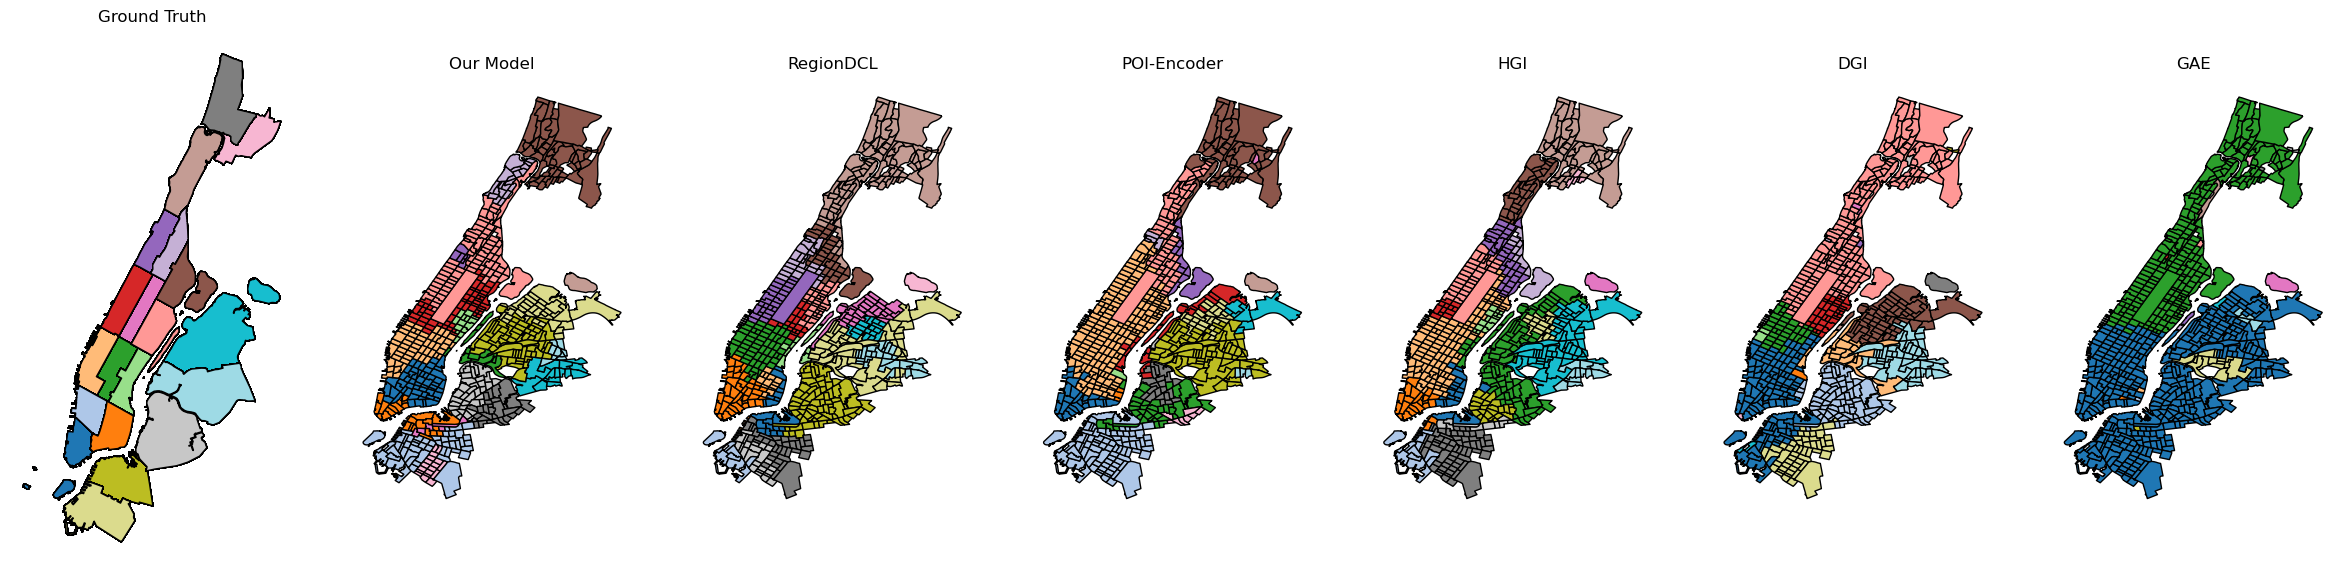

In [136]:
fig, ax = plt.subplots(1, len(d.keys()), figsize=(30, 20))

for index, x in enumerate(d.keys()):
    d[x]['gdf'].plot(column="regions", cmap="tab20", edgecolor="black", ax=ax[index]).axis("off")
    ax[index].set_title(d[x]['name'])

plt.plot()

## Chicago

In [148]:
for x in d.keys():
    if x == 'ground_truth':
        continue
    print(f"""{d[x]['name']} - ARI: {d[x]['ari']}, NMI: {d[x]['nmi']}""")

Our Model - ARI: 0.42463474509141275, NMI: 0.6121756742137452
RegionDCL - ARI: 0.3312534468923215, NMI: 0.5501856231773189
POI-Encoder - ARI: 0.24487067377597166, NMI: 0.5131871053600752
HGI - ARI: 0.20501183075183857, NMI: 0.4607696357314093
DGI - ARI: 0.19443504898846112, NMI: 0.4585248136049384
GAE - ARI: 0.12105397800875708, NMI: 0.31849353493595123


[]

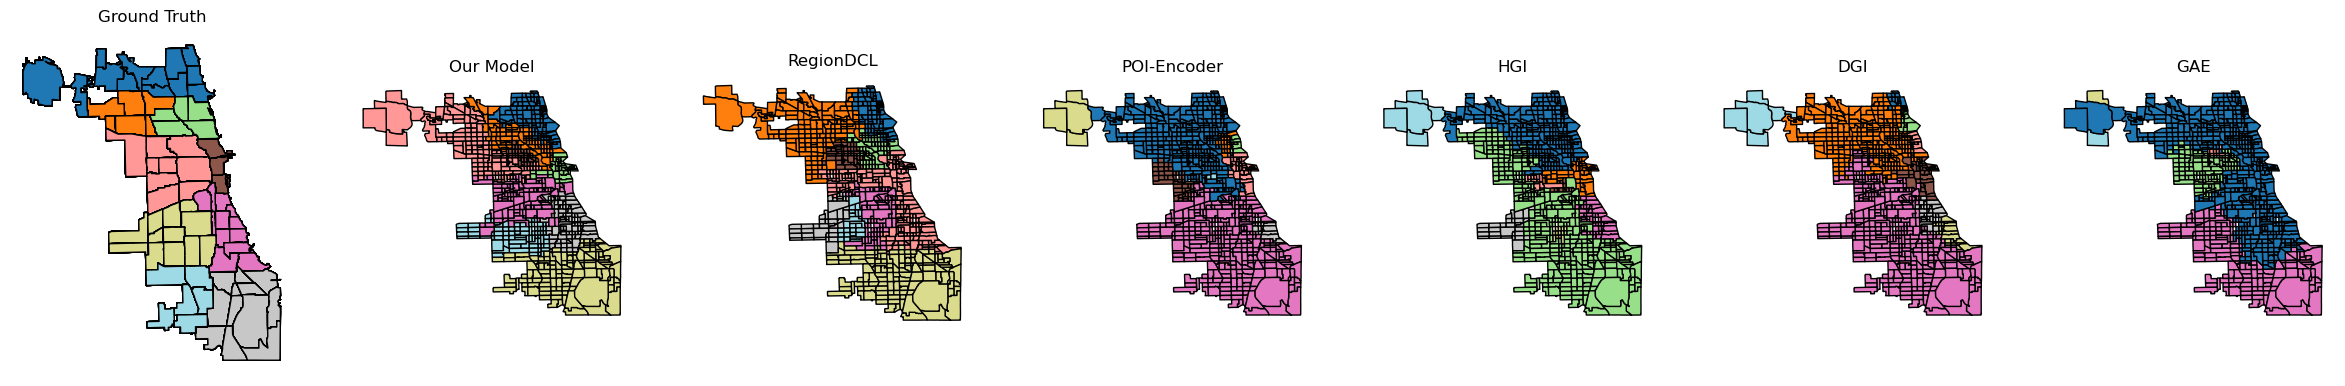

In [149]:
fig, ax = plt.subplots(1, len(d.keys()), figsize=(30, 20))

for index, x in enumerate(d.keys()):
    d[x]['gdf'].plot(column="regions", cmap="tab20", edgecolor="black", ax=ax[index]).axis("off")
    ax[index].set_title(d[x]['name'])

plt.plot()